**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.



**Objective**: To create a multiclass classification model using a custom convolutional neural network in tensorflow

**Data Summary**:
The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

    Actinic keratosis
    Basal cell carcinoma
    Dermatofibroma
    Melanoma
    Nevus
    Pigmented benign keratosis
    Seborrheic keratosis
    Squamous cell carcinoma
    Vascular lesion


### Importing Skin Cancer Data
Data Mounted at /content/drive to be used by Colab

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

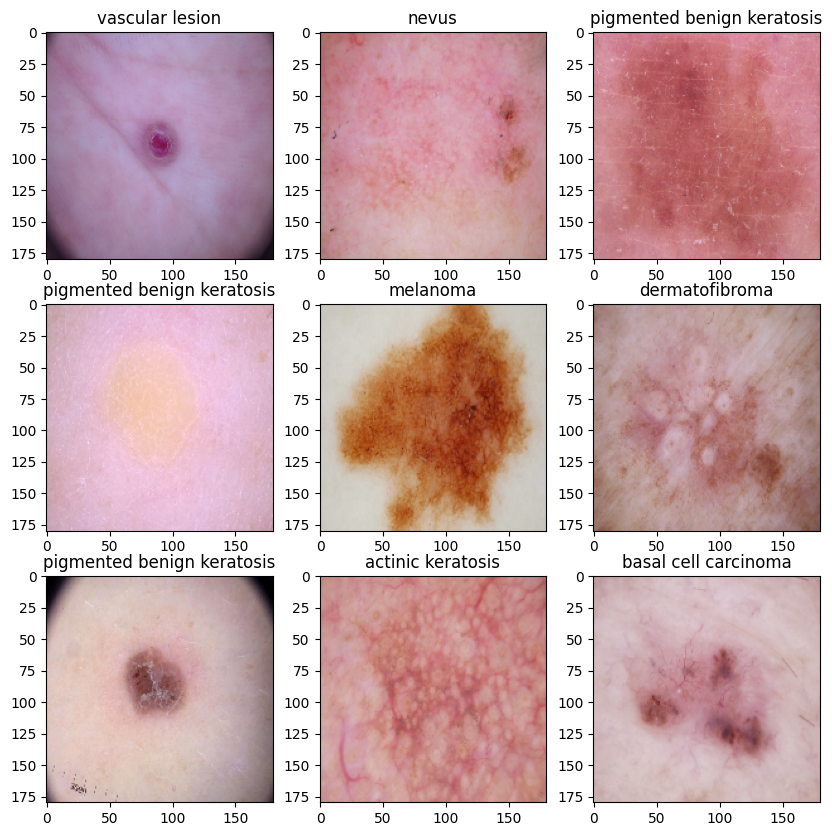

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i,_ in enumerate(class_names):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
plt.show()


### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Processing Data using 3 Models:**

**Model-1**: Use appropriate optimiser and loss function for model training 

**Model-2**: Use augumented strategy for model training

**Model-3**: include normalization (Each class have same Images) strategy for model training

**### Create the model (Model-1)**
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(9,activation='softmax'))



### Compile the model
Choose an appropriate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 217s 872ms/step - loss: 1.8715 - accuracy: 0.3052 - val_loss: 1.6667 - val_accuracy: 0.4362
Epoch 2/20
56/56 [==============================] - 1s 20ms/step - loss: 1.6193 - accuracy: 0.4224 - val_loss: 1.5567 - val_accuracy: 0.4251
Epoch 3/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4323 - accuracy: 0.4972 - val_loss: 1.5041 - val_accuracy: 0.4720
Epoch 4/20
56/56 [==============================] - 1s 18ms/step - loss: 1.3509 - accuracy: 0.5385 - val_loss: 1.4323 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 1s 19ms/step - loss: 1.3104 - accuracy: 0.5352 - val_loss: 1.3838 - val_accuracy: 0.5391
Epoch 6/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1953 - accuracy: 0.5826 - val_loss: 1.3328 - val_accuracy: 0.5570
Epoch 7/20
56/56 [==============================] - 1s 19ms/step - loss: 1.1819 - accuracy: 0.5865 - val_loss: 1.4758 - val_accuracy: 0.5347
Epoch 8/20
56/56 [===

### Visualizing training results

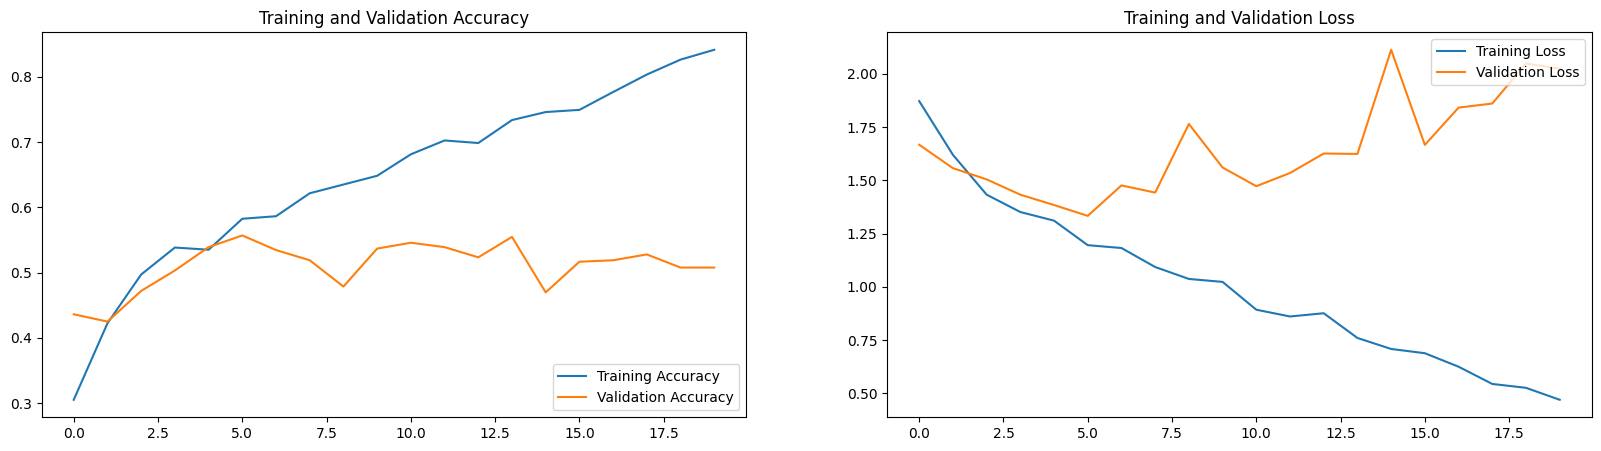

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: see if there is an evidence of model overfit or underfit

Observation :

Train accuracy = 0.85

Validation accuracy = 0.53

val loss = 2.16

loss = 0.49

There is a significant difference between validation and train accuracy this shows model has overfitted

We Need to choose right augumented strategy as the data has more class imbalance


In [17]:
# Keras data augumentation
layer_augmentation = keras.Sequential([
    layers.RandomFlip(mode="horizontal_and_vertical", seed=47,
                      input_shape=(img_height, img_width, 3)),
    
    layers.RandomRotation(0.1, fill_mode='reflect', interpolation='bilinear', seed=47,
                          fill_value=0.0, input_shape=(img_height, img_width, 3)),
])

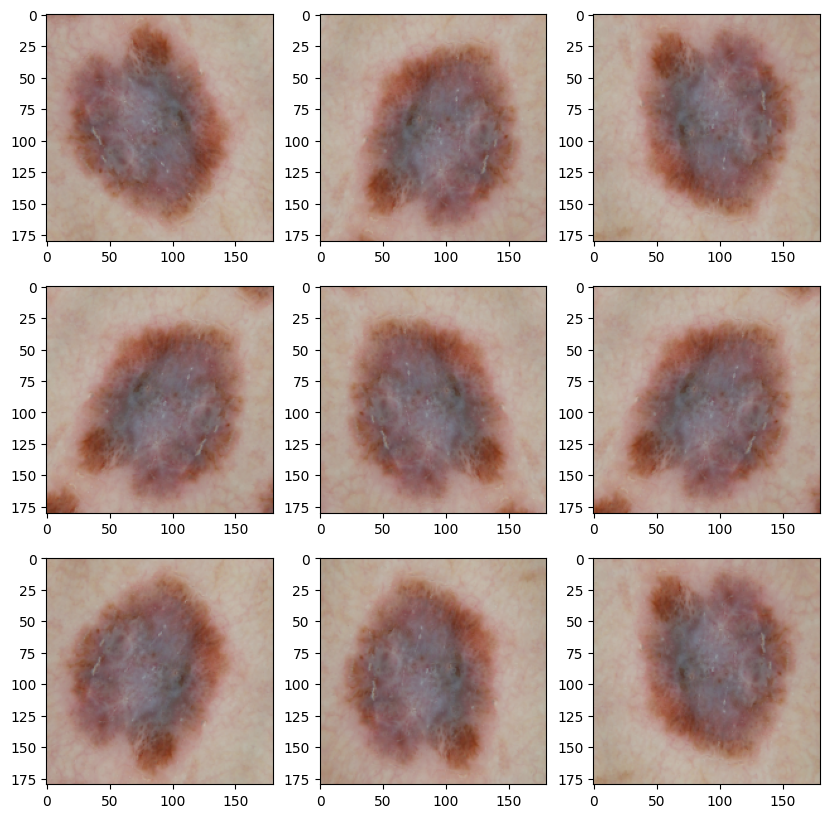

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        np.random.seed(i)
        augmented_images = layer_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))

### Todo:
### Create the model, compile and train the model **(Model-2)**




In [19]:
### Your code goes here
num_classes = len(class_names)

model_2 = Sequential([
    layer_augmentation,
    
    # input
    layers.experimental.preprocessing.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),

    # conv-1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # conv-2
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # conv-3
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # FC layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    # output layer
    layers.Dense(num_classes)
])

### Compiling the model

In [20]:
### Todo, choose an appropirate optimiser and loss function
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


**Training the model**

In [21]:
# train the model
epochs = 20
model_2_res = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 35ms/step - loss: 2.1019 - accuracy: 0.2444 - val_loss: 1.9176 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 2s 31ms/step - loss: 1.8021 - accuracy: 0.3510 - val_loss: 1.6985 - val_accuracy: 0.3870
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.6178 - accuracy: 0.4330 - val_loss: 1.5706 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4971 - accuracy: 0.4794 - val_loss: 1.5378 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4208 - accuracy: 0.5073 - val_loss: 1.4582 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3709 - accuracy: 0.5156 - val_loss: 1.4400 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.3590 - accuracy: 0.5173 - val_loss: 1.4161 - val_accuracy: 0.5302
Epoch 8/20
56

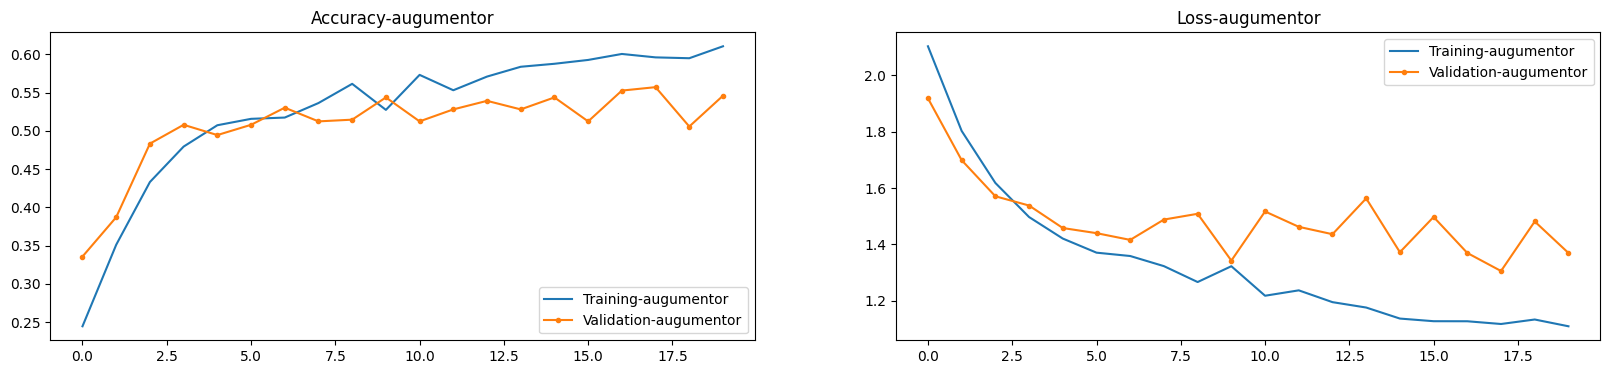

In [22]:
# visualize performance
acc = model_2_res.history['accuracy']
val_acc = model_2_res.history['val_accuracy']

loss = model_2_res.history['loss']
val_loss = model_2_res.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 4))

# model-3 with data augumentation
plt.subplot(1,2, 1)
plt.plot(epochs_range, acc, label='Training-augumentor')
plt.plot(epochs_range, val_acc, label='Validation-augumentor', marker=".")
plt.legend(loc='lower right')
plt.title('Accuracy-augumentor')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training-augumentor')
plt.plot(epochs_range, val_loss, label='Validation-augumentor', marker=".")
plt.legend(loc='upper right')
plt.title('Loss-augumentor')

plt.show()

Model performance:

loss: 1.04 accuracy: 0.62

val_loss: 1.3182

val_accuracy: 0.55

Here we can see that there is not that much difference between Val loss and training loss. Loss values are close.

It's not showing overfitting but accuracy is low. Need to improve accuracy. That's why we should generate more artificial data.


**Todo: Find the distribution of classes in the training dataset.**

**Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.**

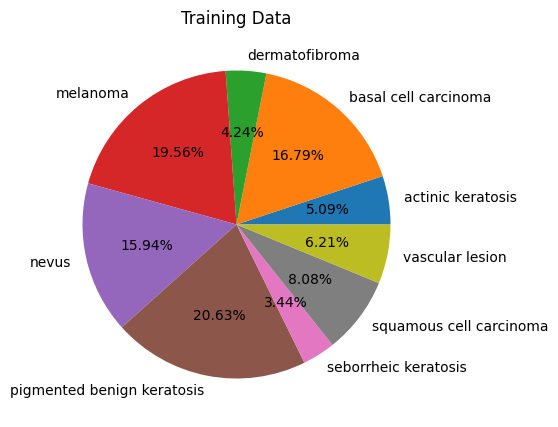

In [23]:
## Your code goes here.
counts_t = []
for cls in class_names:
    dir = data_dir_train / cls
    counts_t.append(len(list(dir.glob('*.jpg'))))

plt.figure(figsize=[15, 5])
ax = plt.subplot(1, 2, 1)
ax.pie(counts_t, labels = class_names, autopct='%1.2f%%')
ax.set_title("Training Data")

plt.show()

**Todo: Write your findings here:**

**- Which class has the least number of samples?**

**- Which classes dominate the data in terms proportionate number of samples?**

Observation: From chart, We can see huge class imbalance in data.

Pigmented Benign Keratosis having highest portion, 20.63% data

Seborrheic Keratosis having least portion, 3.44% data only

**Following Classes dominated the data samples:**

Pigmented benign keratosis, Melanoma,Basal cell carcinoma,Nevus


**Todo: Rectify the class imbalance**

**Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.**


In [24]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

    1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
    2. Define a number of operations to perform on this data set using your Pipeline object.
    3. Execute these operations by calling the Pipeline’s sample() method.



In [25]:
path_to_training_dataset = data_dir_train
import Augmentor
import shutil
for i, cls in enumerate(class_names):
    p = Augmentor.Pipeline(str(path_to_training_dataset / cls))
    p.rotate(probability=0.2, max_left_rotation=10, max_right_rotation=10)
    p.flip_random(probability=0.2)
    p.sample(500) ## We are adding new samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF10126020>: 100%|██████████| 500/500 [00:14<00:00, 34.05 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCE91E3BDF0>: 100%|██████████| 500/500 [00:15<00:00, 32.49 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCE91F373D0>: 100%|██████████| 500/500 [00:14<00:00, 34.27 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FCE91E23490>: 100%|██████████| 500/500 [01:00<00:00,  8.22 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7FCE91EA2320>: 100%|██████████| 500/500 [00:55<00:00,  8.95 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCE91FBCFD0>: 100%|██████████| 500/500 [00:15<00:00, 32.84 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCE91F896C0>: 100%|██████████| 500/500 [00:29<00:00, 17.22 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF10E0B100>: 100%|██████████| 500/500 [00:14<00:00, 34.16 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_Data_Store/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCE91E21E70>: 100%|██████████| 500/500 [00:14<00:00, 33.87 Samples/s]


In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [27]:
path_list = [x for x in data_dir_train.glob('*/*.jpg')]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in data_dir_train.glob('*/*.jpg')]
original_df = pd.DataFrame(dict(Path=path_list, Label=lesion_list) ,columns = ['Path','Label'])

In [28]:
path_list_new = [x for x in data_dir_train.glob('*/output/*.jpg')]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in data_dir_train.glob('*/output/*.jpg')]
dataframe_dict_new = pd.DataFrame(dict(Path=path_list_new, Label=lesion_list_new) ,columns = ['Path','Label'])

In [29]:
new_df = original_df.append(dataframe_dict_new)

<ipython-input-29-22925120b768>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(dataframe_dict_new)


In [30]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

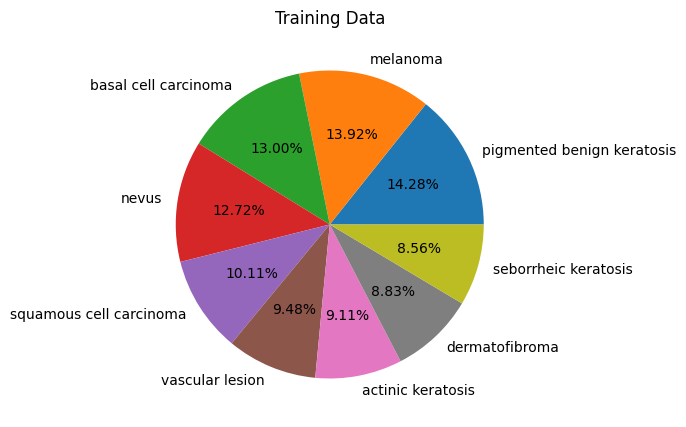

In [31]:
# class distribution after artificial data generation
plt.figure(figsize=[15, 5])
ax = plt.subplot(1, 2, 1)
ax.pie(new_df['Label'].value_counts().values, labels = new_df['Label'].value_counts().index, autopct='%1.2f%%')
ax.set_title("Training Data")
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.


**Todo: Train the model on the data created using Augmentor**

In [32]:
batch_size = 32
img_height = 180
img_width = 180

Todo: Create a training dataset

In [33]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Todo: Create a validation dataset**

In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [35]:
# optimize IO operation
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Todo: Create your model (make sure to include normalization)(Model-3)**

In [36]:
### Your code goes here
num_classes = len(class_names)

model_3 = Sequential([
    layer_augmentation,
    
    # input
    layers.experimental.preprocessing.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),

    # conv-1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # conv-2
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # conv-3
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # FC layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    # output layer
    layers.Dense(num_classes)
])

**Todo: Compile your model (Choose optimizer and loss function appropriately)**

In [37]:
## your code goes here

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Todo: Train your model**

In [38]:
epochs = 50
model_3_res = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 43s 84ms/step - loss: 2.0305 - accuracy: 0.2222 - val_loss: 1.7829 - val_accuracy: 0.3088
Epoch 2/50
169/169 [==============================] - 4s 22ms/step - loss: 1.6782 - accuracy: 0.3459 - val_loss: 1.5117 - val_accuracy: 0.4395
Epoch 3/50
169/169 [==============================] - 4s 22ms/step - loss: 1.4507 - accuracy: 0.4462 - val_loss: 1.3826 - val_accuracy: 0.4699
Epoch 4/50
169/169 [==============================] - 4s 24ms/step - loss: 1.3592 - accuracy: 0.4904 - val_loss: 1.3196 - val_accuracy: 0.4848
Epoch 5/50
169/169 [==============================] - 4s 22ms/step - loss: 1.2796 - accuracy: 0.5098 - val_loss: 1.2084 - val_accuracy: 0.5264
Epoch 6/50
169/169 [==============================] - 4s 22ms/step - loss: 1.2444 - accuracy: 0.5258 - val_loss: 1.2336 - val_accuracy: 0.5174
Epoch 7/50
169/169 [==============================] - 5s 31ms/step - loss: 1.2114 - accuracy: 0.5319 - val_loss: 1.1606 - val_accuracy: 0.565

**Todo: Visualize the model results**

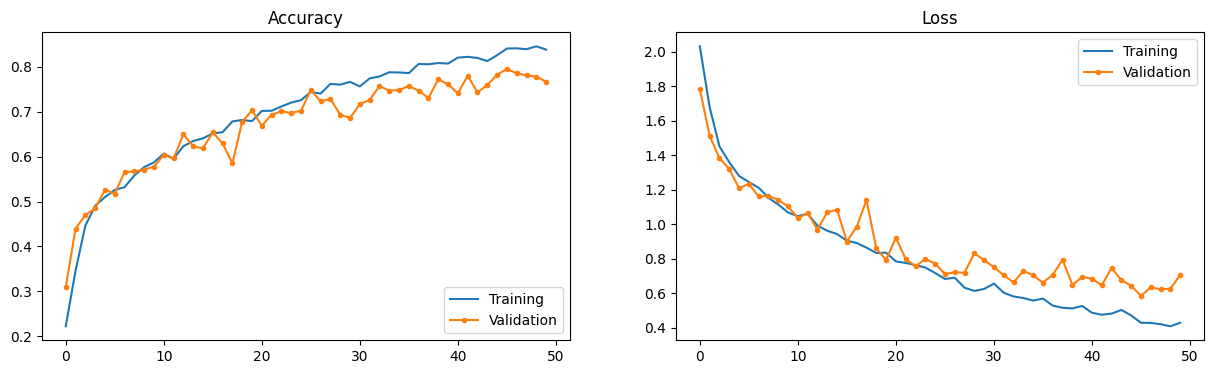

In [39]:
acc = model_3_res.history['accuracy']
val_acc = model_3_res.history['val_accuracy']

loss = model_3_res.history['loss']
val_loss = model_3_res.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 4))

# model-3 with artificial data
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation', marker=".")
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation', marker=".")
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Yes, we have get rid of overfitting after we put same image count (i.e. 500) in all classes and process the data in Model3